In [2]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import string
#this will allow the plot to be inline in the browser
%matplotlib inline

## The data is a Multigraph, we need this function to avoid multiple edges

In [85]:
def fromMulti_to_Single(G):
    H = nx.Graph()
    for u,v,d in G.edges(data=True):
        H.add_edge(u,v)
    return H

## This part reads all the files and save propoerties (num nodes, path length and clustering coefficient)

In [128]:
g = nx.Graph()
fnames=[]
node_num=[]
for fn in glob.iglob('/Users/marta/CYPLAN290/Assignment1/SubwayData/*.net'):
    fnames.append(fn)
    #print fname[0]
    g=nx.read_pajek(fn)
    G = max(nx.connected_component_subgraphs(g), key=len)
    node_num.append(G.number_of_nodes())

In [137]:
node_num

[82, 104, 108, 128, 134, 141, 147, 148, 170, 209, 217, 266, 299, 392, 433]

In [130]:
I=np.argsort(node_num)

In [126]:
I

array([ 4,  1, 10,  0,  8,  3,  7, 13,  2,  6, 14,  5, 11, 12,  9])

## Read in Sorted order and Calculate avg C and avg Shortest Path Length 

In [142]:
pathlength=[]
clustering=[]
node_num=[]
names=[]
for i in I:
    #print fnames[i]
    g=nx.read_pajek(fnames[i])
    fn=fnames[i]
    fname = str.split(fn[46:],'.')  ### Modify accordingly or comment this and next line
    names.append(fname[0])
    G = max(nx.connected_component_subgraphs(g), key=len)
    node_num.append(G.number_of_nodes())
    H=fromMulti_to_Single(G)
    clustering.append(nx.average_clustering(H))
    pathlength.append(nx.average_shortest_path_length(H))

In [143]:
node_num

[82, 104, 108, 128, 134, 141, 147, 148, 170, 209, 217, 266, 299, 392, 433]

In [144]:
names

['HongKong',
 'Beijing',
 'Osaka',
 'Barcelona',
 'Moscow',
 'Chicago',
 'Mexico',
 'Shanghai',
 'Berlin',
 'Madrid',
 'Tokyo',
 'London',
 'Paris',
 'Seoul',
 'NewYork']

## Plot shortest path length 

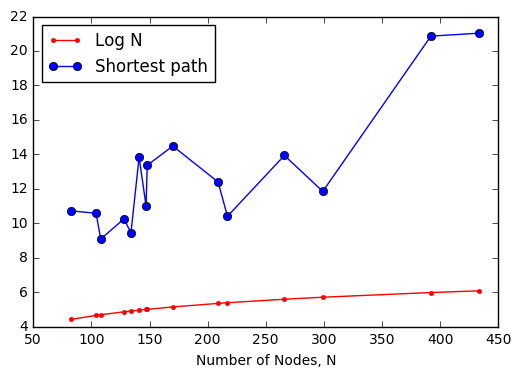

In [145]:
plt.plot(node_num,np.log(node_num),'-r.',label='Log N')
plt.plot(node_num,pathlength,'-bo',label='Shortest path')
plt.legend(loc="upper left")
plt.xlabel("Number of Nodes, N")
plt.show()

## Plot Clustering Coefficient

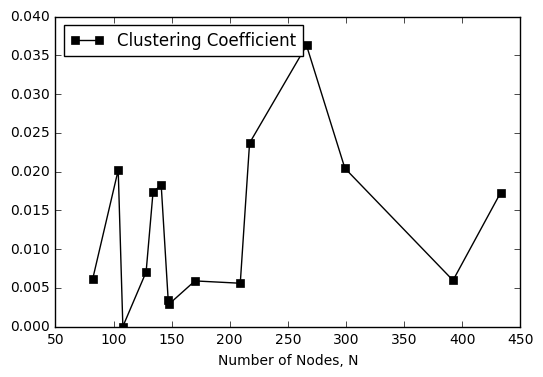

In [147]:
plt.plot(node_num,clustering,'-ks',label='Clustering Coefficient')
plt.legend(loc="upper left")
plt.xlabel("Number of Nodes, N")
plt.show()

## Exercise compare to the Random Graph with same number of Nodes and average degree

## Exercise compare to the SW Graph with same number of Nodes, average degree and Clustering Coefficient